## Problem Statement : 
### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Dataset Link
#### https://archive.ics.uci.edu/dataset/222/bank+marketing

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [65]:
data = pd.read_csv("Bank.csv",delimiter=';')

In [66]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [67]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [68]:
BankData=data
BankData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### It is mentioned in the description that if pdays means 999 than it means the customer was not contacted before

<Axes: xlabel='pdays', ylabel='Count'>

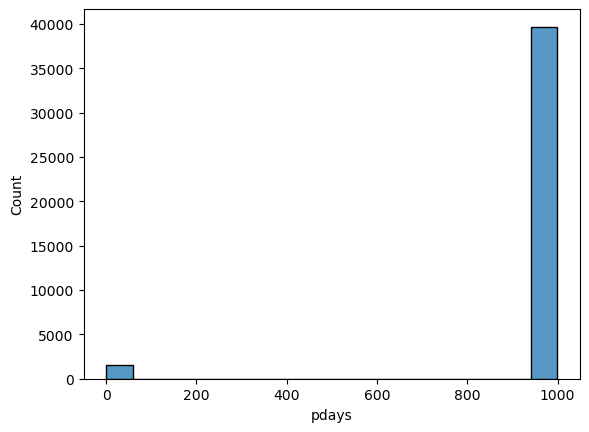

In [69]:
sns.histplot(BankData["pdays"])

#### It seems that most of the customers are there who have not been contacted earlier and very few which are contacted earlier ,So this numeric variable can be changed in previously contacted yes and no options

In [70]:
PreviousContact=[]
for e in BankData["pdays"]:
    if e==999:
        PreviousContact.append("No")
    else:
        PreviousContact.append("Yes")
#PreviousContact

In [71]:
BankData["PreviouslyContact"] = PreviousContact

In [72]:
BankData.drop(["pdays"],axis=1,inplace=True)

In [73]:
#previous column is confusing it means no of times a customer is contacted before the campaign so let's rename it
BankData.rename(columns={"previous":"NrOfPrvContacts"},inplace=True)
#campaign column tells no of times a customer contacted during the campaign so let's rename it
BankData.rename(columns={"campaign":"NrOfContacts"},inplace=True)

In [74]:
df = BankData

In [75]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,NrOfContacts,NrOfPrvContacts,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,PreviouslyContact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,No
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,No
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,No
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,No
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,No


### It looks fine till now. Let's go for Univariate Analysis

<Axes: >

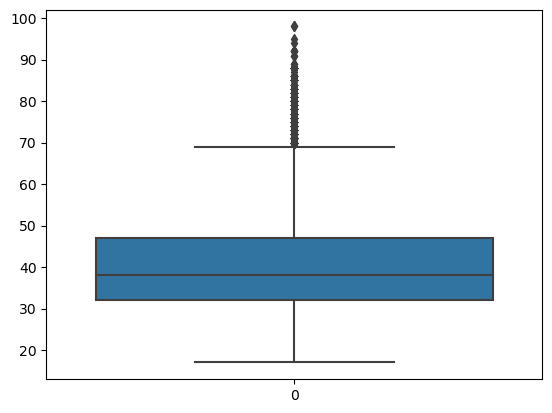

In [76]:
sns.boxplot(BankData["age"])

<Axes: xlabel='age', ylabel='Count'>

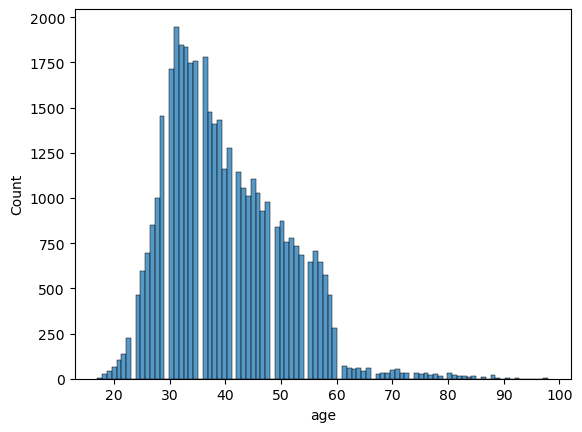

In [77]:
sns.histplot(BankData["age"])

In [78]:
df["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

### Observations - Age:
1. It doesn't look like normal distribution and having some outliers also
2. Some transformation can be applied which we will try later on
3. Average age of the participants in this campaign is around 40 and there are more people in the age range of 30-40
4. Although outliers are present there like age more than 70 but if we think than we can not simply ignore these because many senior citizens might take the plans by considering future of their kids or grandchildren . So simply dropping it would not be a great idea as of now. Let's see what we do later

In [79]:
BankData["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

<Axes: >

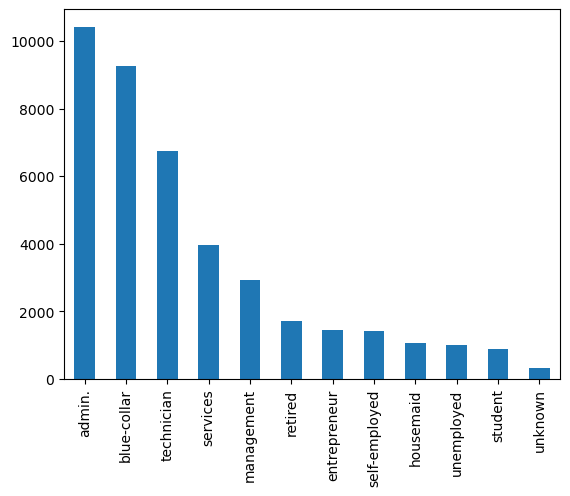

In [80]:
BankData["job"].value_counts().plot.bar()

### Observation - Job:
1. more than 25% people belongs to administration
2. Most people contacted in this campaign belong to administratiion, technician or blue collar job (~63%)
3. Entrepreneur,housemaid,unemployed,student and unknown are less in numbers so we can create a simple other combined class while model building to avoid so many variables but that will be done later on

In [81]:
BankData["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

<Axes: >

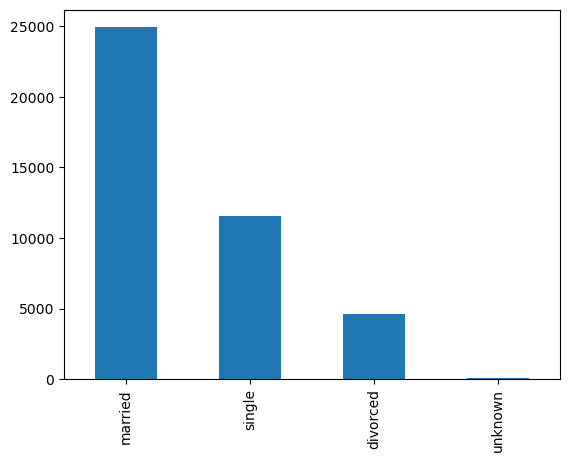

In [82]:
BankData["marital"].value_counts().plot.bar()

### Observation Marital Status:
1. Most people contacted in this campaign are married people
2. There are few cases of unknown which either can be droopped or can be merged with divorced and we can create complicated column. 

In [83]:
BankData["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

<Axes: >

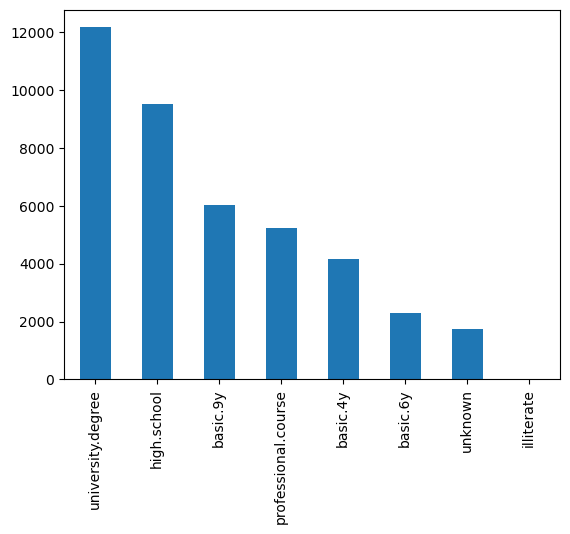

In [84]:
BankData["education"].value_counts().plot.bar()

### Observation - Education:
1. Around 30% people have university degree and around 18 % are very less educated or uneducated
2. More than 50% people have education greater than or equals higher school
3. Here also the 18 % can be merged as a single class to avoid too many variables

In [85]:
BankData["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [86]:
BankData["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

<Axes: >

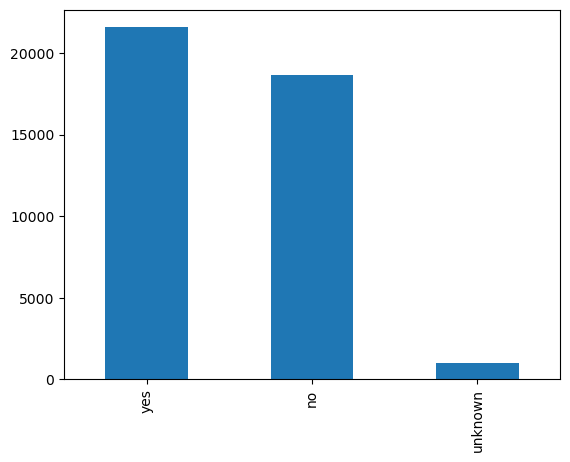

In [87]:
BankData["housing"].value_counts().plot.bar()

In [88]:
BankData["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

<Axes: >

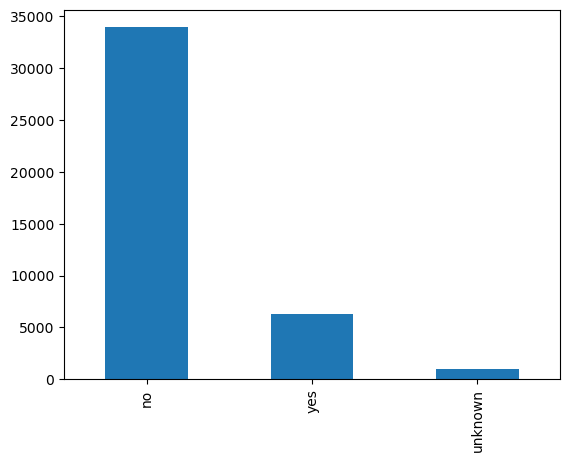

In [89]:
BankData["loan"].value_counts().plot.bar()

### Observation - Defaulter, Housing & Personal Loans
1. Almost 80% people don't have personal loan
2. we will later on also check how many people have personal and housing loan both together
3. Good mixture of people who have housing loan and it might be an important feature while deciding to subscribe for policy
4. Almost no one is defaulter, and it makes sense
5. The unknown also have a significant number for defaulter and it should be investigated.

<Axes: >

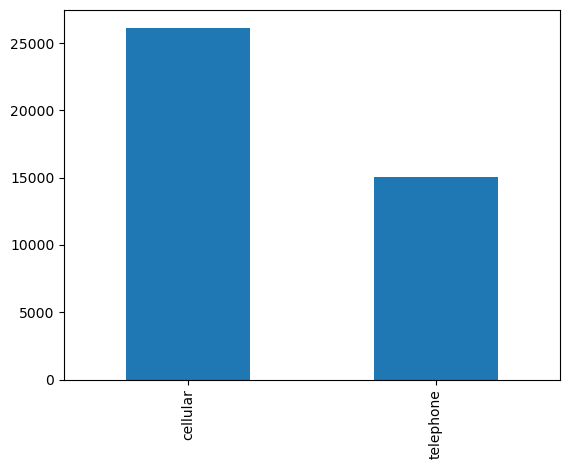

In [90]:
BankData["contact"].value_counts().plot.bar()

<Axes: >

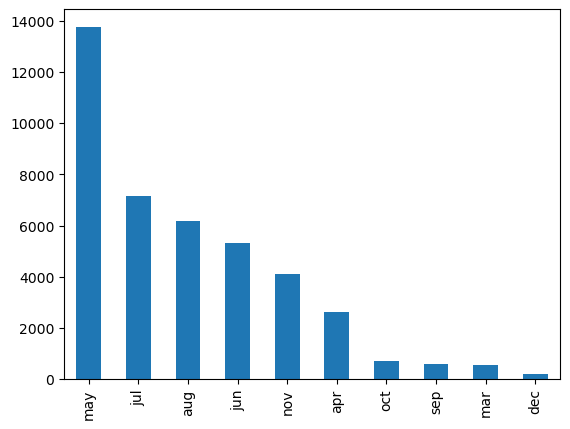

In [91]:
BankData["month"].value_counts().plot.bar()

<Axes: >

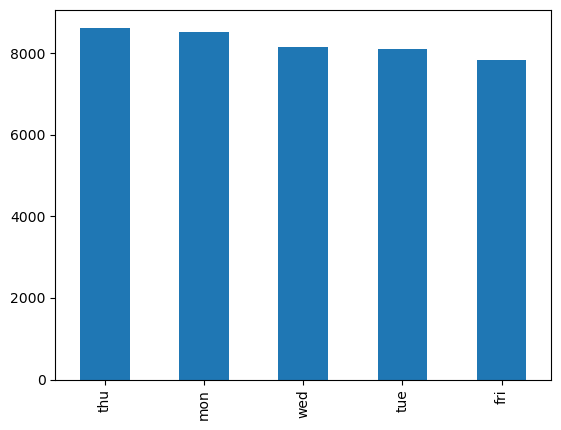

In [92]:
BankData["day_of_week"].value_counts().plot.bar()

### Observations - Contacts:
1. Most people contacted in May month followed by July, August and June.
2. More than 60% people contacted via cellular phone call.
3. Contacts done are usually done on all weekdays in similar frequency

In [93]:
BankData["NrOfContacts"].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: NrOfContacts, dtype: int64

<Axes: >

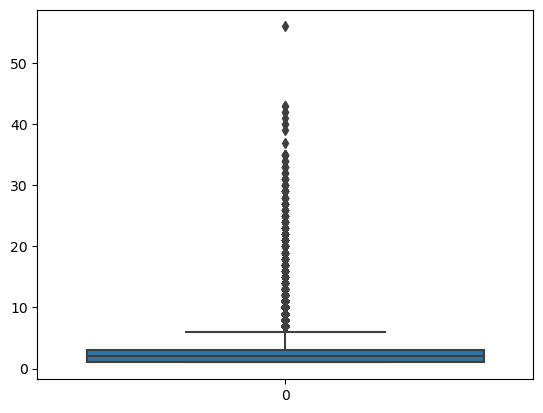

In [94]:
sns.boxplot(BankData["NrOfContacts"])

### there is a clear uncertainty for number of calls done in the campaign

<Axes: >

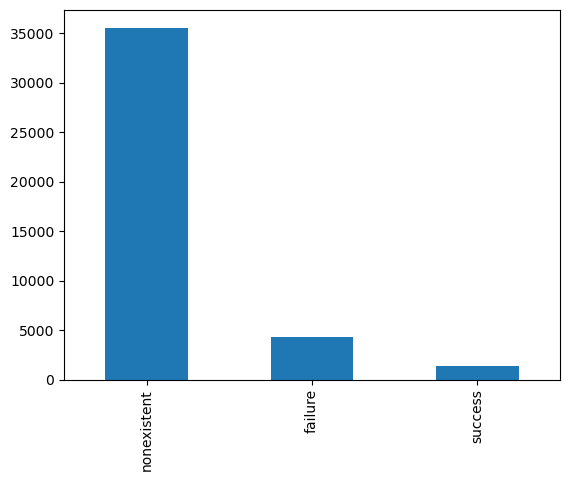

In [95]:
BankData["poutcome"].value_counts().plot.bar()

In [96]:
# Because most things are non-existant so I am dropping it
BankData.drop(["poutcome"],axis=1,inplace=True)

<Axes: >

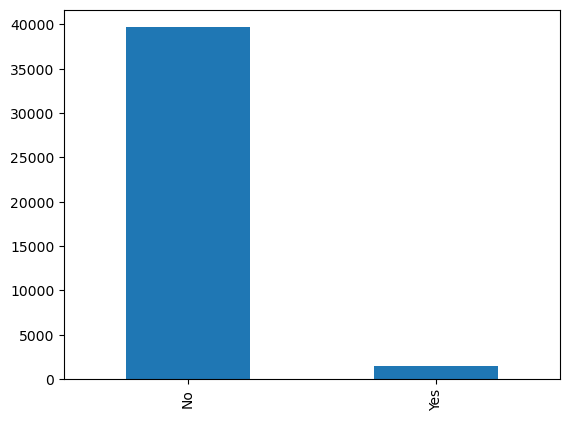

In [97]:
BankData["PreviouslyContact"].value_counts().plot.bar()

In [98]:
BankData["PreviouslyContact"].value_counts()

No     39673
Yes     1515
Name: PreviouslyContact, dtype: int64

In [99]:
df = BankData

### Time for Bi and Multivariate Analysis

#### I will do it based on the questions one can get while thinking about the dataset and problem statement

#### Q1 . Does age affecting the subscription chances of customers ?

<Axes: xlabel='age', ylabel='Count'>

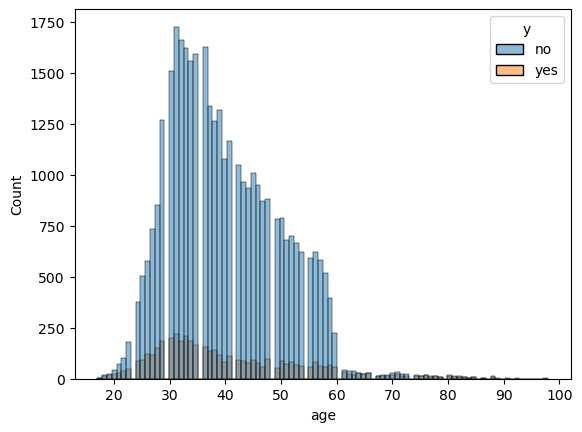

In [100]:
sns.histplot(df,x='age',hue='y')

#### Observation : People taking subscription are mostly from age range 25 to 40 but the conversion but as everyone is contacted atleast once during this campaign the conversion is also low in the same age group. While the conversion of call to successful subscription looks descent in senior citizens group ie >60 age.

#### Q2. What if we combine age,job and education and compare it with decision of taking subscription.

In [101]:
job_group = df.groupby('job')

In [102]:
education_group = df.groupby('education')

In [103]:
len(job_group),len(education_group)

(12, 8)

In [104]:
#job_group.size(),education_group.size()

<Axes: xlabel='job,y'>

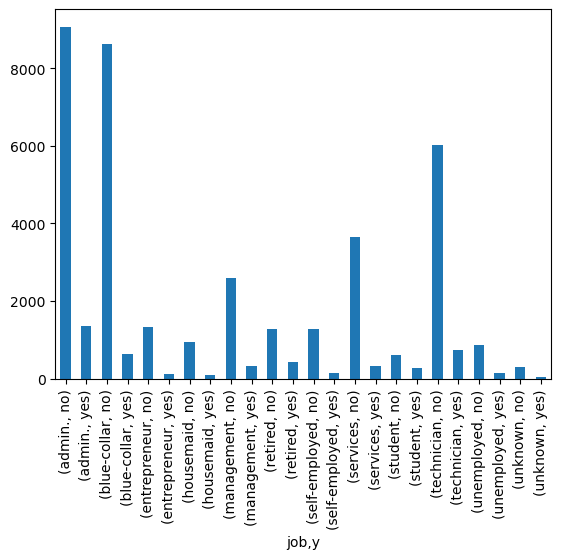

In [105]:
job_group['y'].value_counts().plot.bar()

<Axes: xlabel='education,y'>

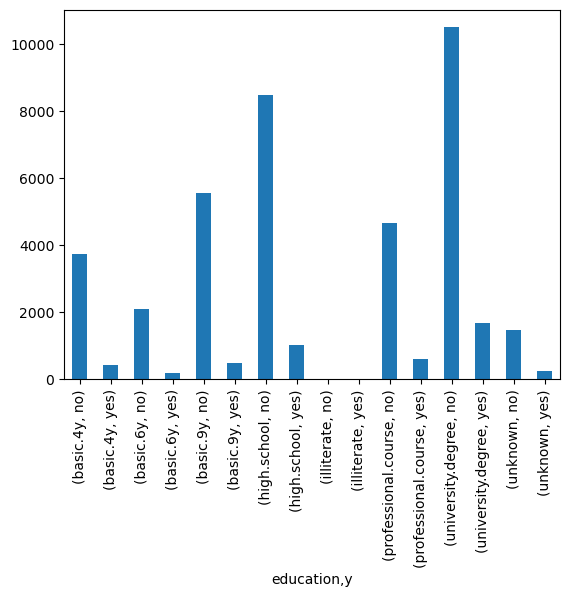

In [106]:
education_group['y'].value_counts().plot.bar()

In [107]:
marital_group = df.groupby('marital')
contact_group = df.groupby('contact')

<Axes: xlabel='marital,y'>

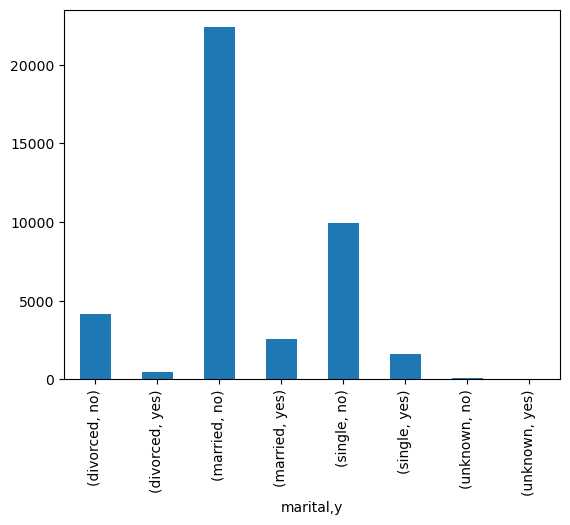

In [108]:
marital_group['y'].value_counts().plot.bar()

<Axes: xlabel='contact,y'>

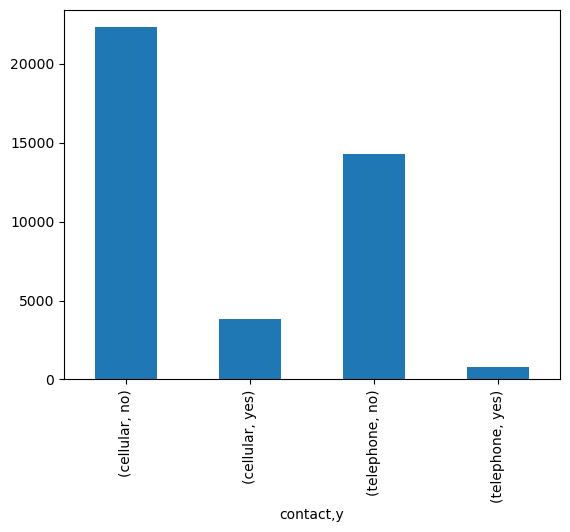

In [109]:
contact_group['y'].value_counts().plot.bar()

<Axes: xlabel='month,y'>

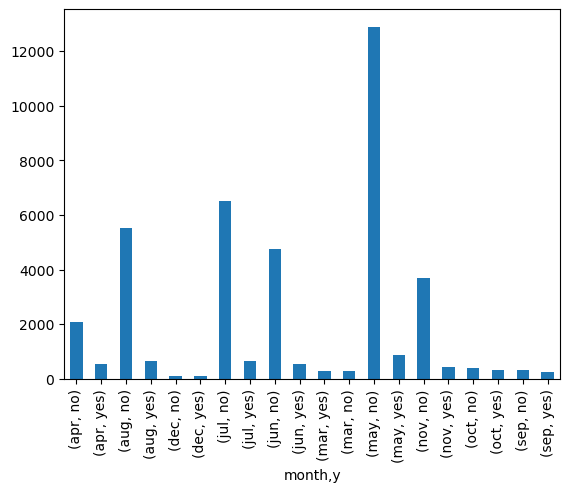

In [110]:
month_group = df.groupby('month')
month_group['y'].value_counts().plot.bar()

<Axes: xlabel='day_of_week,y'>

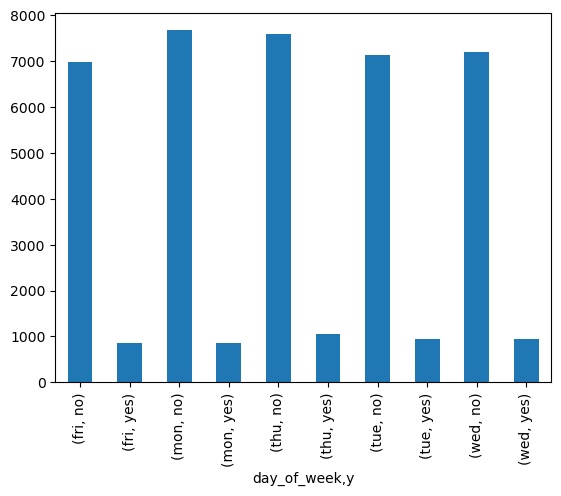

In [111]:
day_group = df.groupby('day_of_week')
day_group['y'].value_counts().plot.bar()

In [113]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,NrOfContacts,NrOfPrvContacts,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,PreviouslyContact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no,No
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no,No
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no,No
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no,No
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no,No


In [114]:
personalloan_group = df.groupby('loan')
housingloan_group = df.groupby('housing')

<Axes: xlabel='loan,y'>

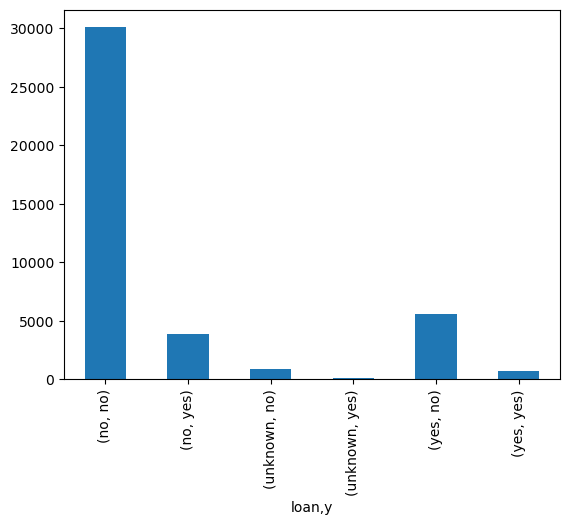

In [115]:
personalloan_group['y'].value_counts().plot.bar()

<Axes: xlabel='housing,y'>

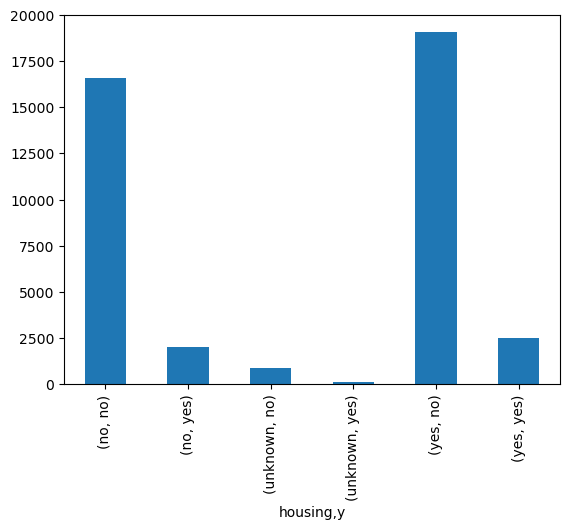

In [116]:
housingloan_group['y'].value_counts().plot.bar()

<Axes: xlabel='PreviouslyContact,y'>

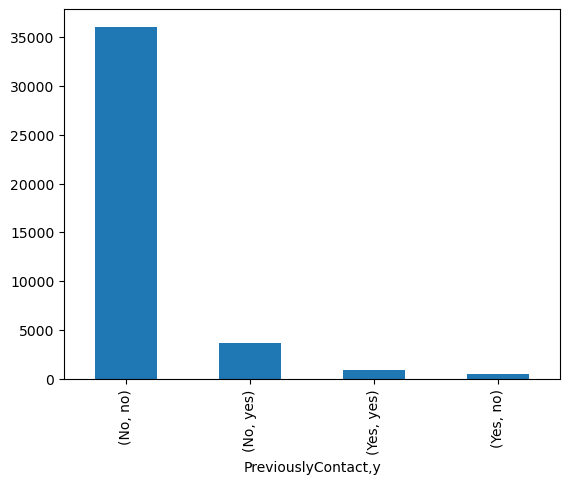

In [117]:
prv_contacted_group = df.groupby('PreviouslyContact')
prv_contacted_group['y'].value_counts().plot.bar()

In [118]:
df['duration'] = df['duration']/60

In [119]:
c1 = df[['housing','loan']]

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [121]:
clf = DecisionTreeClassifier(random_state=0)

In [122]:
one_hot_data = pd.get_dummies(c1[['housing','loan']],drop_first=True)
clf=clf.fit(one_hot_data, df['y'])

[Text(0.5555555555555556, 0.875, 'x[1] <= 0.5\ngini = 0.2\nsamples = 41188\nvalue = [36548, 4640]'),
 Text(0.3333333333333333, 0.625, 'x[3] <= 0.5\ngini = 0.194\nsamples = 19612\nvalue = [17479, 2133]'),
 Text(0.2222222222222222, 0.375, 'x[2] <= 0.5\ngini = 0.194\nsamples = 17055\nvalue = [15196, 1859]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.194\nsamples = 16065\nvalue = [14313, 1752]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.193\nsamples = 990\nvalue = [883, 107]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.191\nsamples = 2557\nvalue = [2283, 274]'),
 Text(0.7777777777777778, 0.625, 'x[3] <= 0.5\ngini = 0.205\nsamples = 21576\nvalue = [19069, 2507]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.207\nsamples = 17885\nvalue = [15787, 2098]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.197\nsamples = 3691\nvalue = [3282, 409]')]

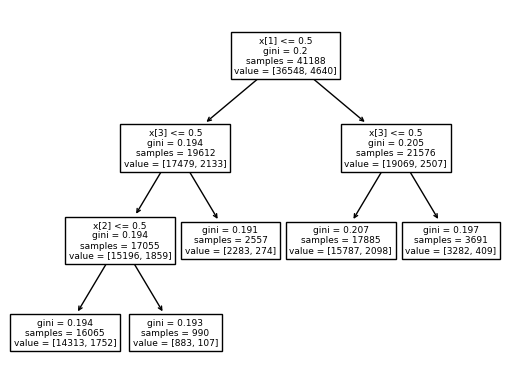

In [123]:
tree.plot_tree(clf)

In [124]:
#i am dropping multiple columns

dropped_labels = ['contact','NrOfPrvContacts','duration','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','NrOfContacts']
df.drop(dropped_labels,axis=1,inplace=True)

In [125]:
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,y,PreviouslyContact
0,56,housemaid,married,basic.4y,no,no,no,may,mon,no,No
1,57,services,married,high.school,unknown,no,no,may,mon,no,No
2,37,services,married,high.school,no,yes,no,may,mon,no,No
3,40,admin.,married,basic.6y,no,no,no,may,mon,no,No
4,56,services,married,high.school,no,no,yes,may,mon,no,No


In [132]:
# I am merging some classes together
df['education'] = df['education'].replace(['basic.4y','basic.6y','basic.9y'],'elementary')
df['y'] = df['y'].replace(['no'],0)
df['y'] = df['y'].replace(['yes'],1)

In [133]:
df.head()

,age,job,marital,education,default,housing,loan,day_of_week,y,PreviouslyContact,Month
0,56,housemaid,married,elementary,no,no,no,mon,0,No,Second_Quarter
1,57,services,married,high.school,unknown,no,no,mon,0,No,Second_Quarter
2,37,services,married,high.school,no,yes,no,mon,0,No,Second_Quarter
3,40,admin.,married,elementary,no,no,no,mon,0,No,Second_Quarter
4,56,services,married,high.school,no,no,yes,mon,0,No,Second_Quarter


In [134]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [135]:
df['Month'] = df['month']
df['Month'] = df['Month'].replace(['jan','feb','mar'],'First_Quarter')
df['Month'] = df['Month'].replace(['apr','may','jun'],'Second_Quarter')
df['Month'] = df['Month'].replace(['jul','aug','sep'],'Third_Quarter')
df['Month'] = df['Month'].replace(['oct','nov','dec'],'Fourth_Quarter')
df.drop('month',axis=1,inplace=True)

KeyError: 'month'

In [136]:
df.head()

,age,job,marital,education,default,housing,loan,day_of_week,y,PreviouslyContact,Month
0,56,housemaid,married,elementary,no,no,no,mon,0,No,Second_Quarter
1,57,services,married,high.school,unknown,no,no,mon,0,No,Second_Quarter
2,37,services,married,high.school,no,yes,no,mon,0,No,Second_Quarter
3,40,admin.,married,elementary,no,no,no,mon,0,No,Second_Quarter
4,56,services,married,high.school,no,no,yes,mon,0,No,Second_Quarter


In [137]:
df['Month'].value_counts()

Second_Quarter    21719
Third_Quarter     13922
Fourth_Quarter     5001
First_Quarter       546
Name: Month, dtype: int64

In [138]:
x = df.drop('y',axis=1)
y = df['y']


In [139]:
x

,age,job,marital,education,default,housing,loan,day_of_week,PreviouslyContact,Month
0,56,housemaid,married,elementary,no,no,no,mon,No,Second_Quarter
1,57,services,married,high.school,unknown,no,no,mon,No,Second_Quarter
2,37,services,married,high.school,no,yes,no,mon,No,Second_Quarter
3,40,admin.,married,elementary,no,no,no,mon,No,Second_Quarter
4,56,services,married,high.school,no,no,yes,mon,No,Second_Quarter
...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,fri,No,Fourth_Quarter
41184,46,blue-collar,married,professional.course,no,no,no,fri,No,Fourth_Quarter
41185,56,retired,married,university.degree,no,yes,no,fri,No,Fourth_Quarter
41186,44,technician,married,professional.course,no,no,no,fri,No,Fourth_Quarter


In [140]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.15,random_state=11,stratify=y)

In [142]:
x_train.shape, x_test.shape

((35009, 10), (6179, 10))

In [143]:
y_train.shape, y_test.shape

((35009,), (6179,))

In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

In [76]:
# ohe = OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore')
# ohe.fit(x_tr['job','marital','education','default','housing','loan','day_of_week',
#                        ain[                    'PreviouslyContact','Month']])
# x_train_transformed = ohe.transform(x_train[['job','marital','education','default','housing','loan','day_of_week',
#                                            'PreviouslyContact','Month']])
# x_test_transformed =  ohe.transform(x_test[['job','marital','education','default','housing','loan','day_of_week',
#                                            'PreviouslyContact','Month']])

In [147]:
x_train.head(1)

,age,job,marital,education,default,housing,loan,day_of_week,PreviouslyContact,Month
36000,32,admin.,married,university.degree,no,yes,no,tue,No,Second_Quarter


In [148]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

In [151]:
step2_LR = LogisticRegression()
step2_DT  =DecisionTreeClassifier()
step2_RF = RandomForestClassifier()
step2_NB = GaussianNB()
step2_GBM =GradientBoostingClassifier()
step2_XGB = XGBClassifier()

### Pipeline 

In [152]:
pipe_LR = Pipeline([
    ('step1',step1),
    ('step2',step2_LR)
])

In [153]:
pipe_LR.fit(x_train,y_train)

C:\Users\MAHES\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\MAHES\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('step2', LogisticRegression())])

In [154]:
y_pred_LR = pipe_LR.predict(x_test)

In [155]:
LR_acc = accuracy_score(y_test,y_pred_LR)
LR_recall = recall_score(y_test,y_pred_LR)
LR_pre = precision_score(y_test,y_pred_LR)
LR_f1 = f1_score(y_test,y_pred_LR)
print("            Logistic Regression              ")
print()
print("Accuracy:",LR_acc)
print("Recall:",LR_recall)
print("Precision:",LR_pre)
print("F1:",LR_f1)
print()


            Logistic Regression              

Accuracy: 0.8959378540216864
Recall: 0.2025862068965517
Precision: 0.6157205240174672
F1: 0.30486486486486486



In [158]:
pipe_DT = Pipeline([
    ('step1',step1),
    ('step2',step2_DT)
])

In [159]:
pipe_DT.fit(x_train,y_train)

C:\Users\MAHES\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('step2', DecisionTreeClassifier())])

In [160]:
y_pred_DT = pipe_DT.predict(x_test)

In [165]:
DT_acc = accuracy_score(y_test,y_pred_DT)
DT_recall = recall_score(y_test,y_pred_DT)
DT_pre = precision_score(y_test,y_pred_DT)
DT_f1 = f1_score(y_test,y_pred_DT)
print("            Decision Tree             ")
print()
print("Accuracy:",DT_acc)
print("Recall:",DT_recall)
print("Precision:",DT_pre)
print("F1:",DT_f1)
print()


            Decision Tree             

Accuracy: 0.846415277553002
Recall: 0.20977011494252873
Precision: 0.26788990825688075
F1: 0.23529411764705882



In [163]:
pipe_RF = Pipeline([
    ('step1',step1),
    ('step2',step2_RF)
])

In [164]:
pipe_RF.fit(x_train,y_train)

C:\Users\MAHES\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('step2', RandomForestClassifier())])

In [167]:
y_pred_RF = pipe_RF.predict(x_test)
RF_acc = accuracy_score(y_test,y_pred_RF)
RF_recall = recall_score(y_test,y_pred_RF)
RF_pre = precision_score(y_test,y_pred_RF)
RF_f1 = f1_score(y_test,y_pred_RF)
print("            Random Forest             ")
print()
print("Accuracy:",RF_acc)
print("Recall:",RF_recall)
print("Precision:",RF_pre)
print("F1:",RF_f1)
print()

            Random Forest             

Accuracy: 0.8702055348761936
Recall: 0.23275862068965517
Precision: 0.3767441860465116
F1: 0.28774422735346356



In [168]:
pipe_NB = Pipeline([
    ('step1',step1),
    ('step2',step2_NB)
])

In [169]:
pipe_NB.fit(x_train,y_train)

C:\Users\MAHES\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('step2', GaussianNB())])

In [179]:
y_pred_NB = pipe_NB.predict(x_test)
NB_acc = accuracy_score(y_test,y_pred_NB)
NB_recall = recall_score(y_test,y_pred_NB)
NB_pre = precision_score(y_test,y_pred_NB)
NB_f1 = f1_score(y_test,y_pred_NB)
print("            Naive Bayes             ")
print()
print("Accuracy:",NB_acc)
print("Recall:",NB_recall)
print("Precision:",NB_pre)
print("F1:",NB_f1)
print()

            Naive Bayes             

Accuracy: 0.8394562226897556
Recall: 0.38362068965517243
Precision: 0.3216867469879518
F1: 0.34993446920052423



In [171]:
pipe_GBM = Pipeline([
    ('step1',step1),
    ('step2',step2_GBM)
])

In [172]:
pipe_GBM.fit(x_train,y_train)

C:\Users\MAHES\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('step2', GradientBoostingClassifier())])

In [178]:
y_pred_GBM = pipe_GBM.predict(x_test)
GBM_acc = accuracy_score(y_test,y_pred_GBM)
GBM_recall = recall_score(y_test,y_pred_GBM)
GBM_pre = precision_score(y_test,y_pred_GBM)
GBM_f1 = f1_score(y_test,y_pred_GBM)
print("         GBM            ")
print()
print("Accuracy:",GBM_acc)
print("Recall:",GBM_recall)
print("Precision:",GBM_pre)
print("F1:",GBM_f1)
print()

         GBM            

Accuracy: 0.8967470464476452
Recall: 0.20833333333333334
Precision: 0.625
F1: 0.3125



In [177]:
pipe_XGB = Pipeline([
    ('step1',step1),
    ('step2',step2_XGB)
])

pipe_XGB.fit(x_train,y_train)

y_pred_XGB = pipe_XGB.predict(x_test)
XGB_acc = accuracy_score(y_test,y_pred_XGB)
XGB_recall = recall_score(y_test,y_pred_XGB)
XGB_pre = precision_score(y_test,y_pred_XGB)
XGB_f1 = f1_score(y_test,y_pred_XGB)
print("            XGB             ")
print()
print("Accuracy:",XGB_acc)
print("Recall:",XGB_recall)
print("Precision:",XGB_pre)
print("F1:",XGB_f1)
print()

C:\Users\MAHES\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


            XGB             

Accuracy: 0.8970707234180288
Recall: 0.20402298850574713
Precision: 0.6339285714285714
F1: 0.30869565217391304



In [ ]:
step2_XGBRF.fit()

### Exporting the model

In [97]:
# import pickle
# pickle.dump(pipe_GBM,open('model.pkl','wb'))